In [31]:
import numpy as np
import networkx as nx
from edge_fetch import edge_terrier
from sklearn.preprocessing import normalize
from sklearn.manifold import SpectralEmbedding
from sklearn.metrics import accuracy_score
from featureAnalysis import featureSelection
from sklearn.metrics.pairwise import euclidean_distances
import matplotlib.pyplot as plt
import matplotlib
from mpl_toolkits.mplot3d import Axes3D

from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import MiniBatchKMeans
from sklearn.mixture import GaussianMixture

#### The clustering Algorithms ####
from cluster import AgglomerativeClustering_BestSil
from cluster import MiniBatch_BestSil
from cluster import GMM_BestSil
from cluster import AgglomerativeClustering_BestAri
from cluster import MiniBatch_BestAri
from cluster import GMM_BestAri

### Feature functions (use featureAnalysis.py)

In [3]:
def getAdjMatrixFeatures(graphList):
    # Eigen vector centrality is calculated using the sklearn function
    # The numFeatures chosen are selected based on the largest values
    # Largest values is determined by averaging the values for a node across all subjects
    # The numFeatures highest averages are used to select the features
    featureObj = featureSelection(graphList)
    X = featureObj.adjacencyMatrixFeatures()
    mat = np.matrix(X, dtype = float)
    all_zeros = []
    for i in range(mat.shape[1]):
        if sum(mat[:,i]) == 0:
            all_zeros.append(i)
    mat = np.delete(mat, all_zeros, 1)
    with open('../output/outfileMat_HBN.txt','wb') as f:
        for line in mat:
            np.savetxt(f, line, fmt='%.2f')
    print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")
    return mat

def getEigenVectorCentralityFeatures(graphList, numFeatures):
    # Eigen vector centrality is calculated using the sklearn function
    # The numFeatures chosen are selected based on the largest values
    # Largest values is determined by averaging the values for a node across all subjects
    # The numFeatures highest averages are used to select the features
    featureObj = featureSelection(graphList)
    X = featureObj.eigenvectorCentrality(numFeatures)
    mat = np.matrix(X, dtype = float)
    all_zeros = []
    for i in range(mat.shape[1]):
        if sum(mat[:,i]) == 0:
            all_zeros.append(i)
    mat = np.delete(mat, all_zeros, 1)
    with open('../output/outfileMat_HBN.txt','wb') as f:
        for line in mat:
            np.savetxt(f, line, fmt='%.2f')
    print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")
    return mat
    
def getKHOPFeatures(graphList, numFeatures):
    # Khop values are calculated using the networkx function
    # The values are calculated for 1 hop and 2 hops for each node
    # The numFeatures chosen are selected based on the highest variance values
    featureObj = featureSelection(graphList)
    X = featureObj.getKhopFeatMat(numFeatures)
    mat = np.matrix(X, dtype = float)
    all_zeros = []
    for i in range(mat.shape[1]):
        if sum(mat[:,i]) == 0:
            all_zeros.append(i)
    mat = np.delete(mat, all_zeros, 1)
    with open('../output/outfileMat_HBN.txt','wb') as f:
        for line in mat:
            np.savetxt(f, line, fmt='%.2f')
    print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")
    return mat

def getEigenValueFeatures(graphList, numFeatures):
    # Eigen vector centrality is calculated using the sklearn function
    # The numFeatures chosen are selected based on the largest values
    # Largest values is determined by averaging the values for a node across all subjects
    # The numFeatures highest averages are used to select the features
    featureObj = featureSelection(graphList)
    X = featureObj.calc_eigval_feature_matrix(numFeatures)
    mat = np.matrix(X, dtype = float)
    all_zeros = []
    for i in range(mat.shape[1]):
        if sum(mat[:,i]) == 0:
            all_zeros.append(i)
    mat = np.delete(mat, all_zeros, 1)
    with open('../output/outfileMat_HBN.txt','wb') as f:
        for line in mat:
            np.savetxt(f, line, fmt='%.2f')
    print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")
    return mat

def getAll(graphList, numFeatures):
    featureObj = featureSelection(graphList)
    X_eig = featureObj.calc_eigval_feature_matrix(numFeatures)
    X_adj = featureObj.adjacencyMatrixFeatures()
    X_khop = featureObj.getKhopFeatMat()
    X_cent = featureObj.eigenvectorCentrality()
    X = np.hstack((X_eig, X_adj))
    X = np.hstack((X, X_khop))
    X =  np.hstack((X, X_cent))
    mat = np.matrix(X, dtype = float)
    all_zeros = []
    for i in range(mat.shape[1]):
        if sum(mat[:,i]) == 0:
            all_zeros.append(i)
    mat = np.delete(mat, all_zeros, 1)
    with open('../output/outfileMat_HBN.txt','wb') as f:
        for line in mat:
            np.savetxt(f, line, fmt='%.2f')
    print("Feature matrix of shape", mat.shape, "outputted. Run Urerf in R now.")
    return mat

### Plotting Functions

In [4]:
def graph2D(mat):
    fig = plt.figure()
    plt.plot(mat[:,0], mat[:,1],'ro')
    fig.suptitle("Visualization of Clustered HBN Data (dwi)", fontsize=20)
    plt.xlabel("Feature 1", fontsize=18)
    plt.ylabel("Feature 2", fontsize=18)
def graph3D(mat):
    fig = plt.figure()
    ax = Axes3D(fig)
    x = mat[:,0]
    y = mat[:,1]
    z = mat[:,2]
    c1 = ax.scatter(x,y,z,marker='x')
    fig.suptitle("Visualization of Clustered HBN Data (dwi)", fontsize=20)
    ax.set_xlabel("Feature 1", fontsize=18)
    ax.set_ylabel("Feature 2", fontsize=18)
    ax.set_zlabel("Feature 3", fontsize=18)
    
def graph2DLabels(mat, labels):
    fig = plt.figure(3, figsize=(10, 10))
    ax = plt.Axes(fig, rect=[0, 0, .5, .5])
    z = list(labels)
    N = len(mat[:,1])
    x = [mat[:,0]]
    y = [mat[:,1]]
    #colors = ["r","k","y","m","dimgrey","b","yellow","palevioletred","cyan","lightgray","orange","lime","slateblue","pink","peru","cornflowerblue","saddlebrown","mediumspringgreen","thistle","lightcoral","slategrey","darkolivegreen","darkorchid","darkblue","brown","indianred","lightpink","paleturquoise","yellowgreen","tan"]
    cmap = matplotlib.cm.get_cmap('plasma')
    normalize = matplotlib.colors.Normalize(vmin=min(z), vmax=max(z))
    colors = [cmap(normalize(value)) for value in z]
    colors = colors[0:numLabels]
    plt.scatter(x, y, color = colors)
    plt.title("HBN Eigenvector Centrality - \nJHU Directory all dwi samples")
    plt.xlabel('Feature 1')
    plt.ylabel('Feature 2')
    
def graph3DLabels(mat, labels):
    fig = plt.figure(4, figsize=(10, 10))
    ax = Axes3D(fig, rect=[0, 0, .5, .5], elev=40, azim=150)
    ax.scatter(mat[:, 0], mat[:, 1], mat[:, 2], c= labels, cmap = "plasma")
    ax.set_title('HBN Eigenvector Centrality - \nJHU Directory all dwi samples')
    ax.w_xaxis.set_ticklabels([])
    ax.w_yaxis.set_ticklabels([])
    ax.set_xlabel('Feature 1')
    ax.set_ylabel('Feature 2')
    ax.set_zlabel('Feature 3')

def plotMultipleDims(dataMatrix, colors, dim, trial_num):
    for i in range(trial_num * len(dim)):
        mat_ = np.matrix(np.vstack(dataMatrix[i][1]))
        dimension = dataMatrix[i][0]
        if i%trial_num == 0:
            plt.scatter(mat_[:,0].tolist(), mat_[:,1].tolist(), c = colors[dim.index(dimension)], label=dimension)
        else:
            plt.scatter(mat_[:,0].tolist(), mat_[:,1].tolist(), c = colors[dim.index(dimension)])
def plotReg(dataMatrices, labels, ylab, xlab, colors):
    for i in range(len(dataMatrices)):
        dat = dataMatrices[i]
        plt.scatter(dat[:,0].tolist(), dat[:,1].tolist(), c = colors[i], label=labels[i])
    plt.ylabel(ylab)
    plt.xlabel(xlab)

In [16]:
##### Load Edgelists #####

# Initialize edgelist collector object
graph_collector = edge_terrier('/Users/paigefrank/Library/Python/3.6/bin/aws', 1 , filepath='hbn/derivatives/graphs/JHU/')
# Make a generator that yields all edgelists in filepath
filelist = graph_collector.convert_edgelist_all()
# Get a list of just the network x objects
graphList = graph_collector.getGraphs(filelist)

sub-NDARDX770PJK_acq-64dir_dwi_JHU.edgelist is empty.


In [17]:
# Get Feature Matrix #
numFeatures = 0 # uses all of the features when numFeatures is set to 0
mat = getAll(graphList[0], numFeatures)

Feature matrix of shape (97, 1302) outputted. Run Urerf in R now.


In [22]:
# Graph the data if the features are less than 3 dimensions #
if numFeatures == 2:
    graph2D(mat)
if numFeatures == 3:
    graph3D(mat)


In [23]:
# Load Urerf Similarity matrix from file #
matrix = open('../input/outfileSimMat_HBN.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)

### Cluster

Because agglomerative clustering on the distance matrix, GMM clustering on the spectrally embedded similarity matrix, and Mini Batch K Means clustering on the spectrally embedded similarity matrix performed the best on the Urerf parameters specified above they are used to cluster the resultant similarity matrix.

For the algorithms that require spectral embedding 2 and 5 dimensions were used based on Iris data performance.

In [ ]:
# Set parameters for the test #
trial_num = 20
t = float(trial_num)
n = 2

# Transform the similarity matrix #

inputMat_transformed = 1 - (inputMat/inputMat.max())

embedding = SpectralEmbedding(n_components=n, affinity = 'precomputed')
inputMat_embedded = embedding.fit_transform(inputMat)

# Lists to hold all of the trials #
ag_data_sil = []

gmm_data_sil_2 = []
mini_data_sil_2 = []

# Call clustering functions which vary the number of clusters from 1 to 20 or the preference and epsilon parameters #
# which vary from their initial values below to the maximum element in each matrix #
for i in range(trial_num):
    bestClustAg, maxSilAg, trials_Ag = AgglomerativeClustering_BestSil(inputMat_transformed, clustInit = 10, clustInc = 1, clustMax = 50)
    ag_data_sil.append(trials_Ag)
    
    bestClustGMM, maxSilGMM, trials_GMM = GMM_BestSil(inputMat_embedded, clustInit = 10, clustInc = 1, clustMax = 50)
    bestClustMini, maxSilMini, trials_Mini = MiniBatch_BestSil(inputMat_embedded, clustInit = 10, clustInc = 1, batchSize = 75, clustMax = 50)
    gmm_data_sil_2.append(trials_GMM)
    mini_data_sil_2.append(trials_Mini)
    

# Now embedding into 5 dimensions #
n = 5
embedding = SpectralEmbedding(n_components=n, affinity = 'precomputed')
inputMat_embedded = embedding.fit_transform(inputMat)

# Lists to hold all of the trials #
gmm_data_sil_5 = []
mini_data_sil_5 = []
gmm_data_ari_5 = []
mini_data_ari_5 = []

for i in range(trial_num):
    
    bestClustGMM, maxSilGMM, trials_GMM = GMM_BestSil(inputMat_embedded, clustInit = 10, clustInc = 1, clustMax = 50)
    bestClustMini, maxSilMini, trials_Mini = MiniBatch_BestSil(inputMat_embedded, clustInit = 10, clustInc = 1, batchSize = 75, clustMax = 50)
    gmm_data_sil_5.append(trials_GMM)
    mini_data_sil_5.append(trials_Mini)


### Plot the results

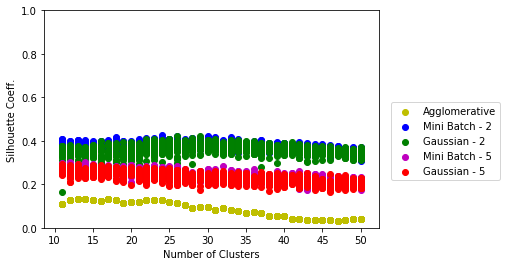

In [28]:
ag_data_sil = np.matrix(np.vstack(ag_data_sil))

mini_data_sil_2 = np.matrix(np.vstack(mini_data_sil_2))
gmm_data_sil_2 = np.matrix(np.vstack(gmm_data_sil_2))

mini_data_sil_5 = np.matrix(np.vstack(mini_data_sil_5))
gmm_data_sil_5 = np.matrix(np.vstack(gmm_data_sil_5))

plt.figure()
plotReg([ag_data_sil, mini_data_sil_2, gmm_data_sil_2, mini_data_sil_5, gmm_data_sil_5], ['Agglomerative', 'Mini Batch - 2', 'Gaussian - 2','Mini Batch - 5', 'Gaussian - 5'],'Silhouette Coeff.','Number of Clusters', ['y','b','g','m','r'])
ax = plt.gca()
ax.set_ylim(0.0,1.0)
plt.legend(loc=9, bbox_to_anchor=(1.2, 0.6))

### Clustering based on sex
The input is the vertex based feature matrix produced by Vivek. 

In [25]:
# Load the vertex stat csv #
mat_tmp = open('../input/hbn_vertexstats.csv').read()
matrix  = []
names = []
sex = []
age = []
for item in mat_tmp.split('\n')[:-1]:
    row = item.split(',')
    names.append(row[0])
    sex.append(row[1])
    age.append(row[2])
    matrix.append(row[3:len(row)])
col_titles = matrix[0]
inputMat_raw = np.matrix(matrix[1:len(matrix)], dtype = float)

# Print out just the data #
with open('../output/hbn_vertexstats_data.txt','wb') as f:
        for line in inputMat_raw:
            np.savetxt(f, line, fmt='%.2f')

In [26]:
# Load the urerf vertex stats output #
matrix = open('../input/hbn_vertexstats_mat.txt').read()
matrix = [item.split() for item in matrix.split('\n')[:-1]]
inputMat = np.matrix(matrix, dtype = float)

### Cluster Urerf vertex stats and plot

In [27]:
# Set parameters for the test #
trial_num = 20
t = float(trial_num)
n = 2

# Transform the similarity matrix #

inputMat_transformed = 1 - (inputMat/inputMat.max())

embedding = SpectralEmbedding(n_components=n, affinity = 'precomputed')
inputMat_embedded = embedding.fit_transform(inputMat)

# Lists to hold all of the trials #
ag_data_sil = []

gmm_data_sil_2 = []
mini_data_sil_2 = []

# Call clustering functions which vary the number of clusters from 1 to 20 or the preference and epsilon parameters #
# which vary from their initial values below to the maximum element in each matrix #
for i in range(trial_num):
    bestClustAg, maxSilAg, trials_Ag = AgglomerativeClustering_BestSil(inputMat_transformed, clustInit = 10, clustInc = 1, clustMax = 50)
    ag_data_sil.append(trials_Ag)
    
    bestClustGMM, maxSilGMM, trials_GMM = GMM_BestSil(inputMat_embedded, clustInit = 10, clustInc = 1, clustMax = 50)
    bestClustMini, maxSilMini, trials_Mini = MiniBatch_BestSil(inputMat_embedded, clustInit = 10, clustInc = 1, batchSize = 75, clustMax = 50)
    gmm_data_sil_2.append(trials_GMM)
    mini_data_sil_2.append(trials_Mini)
    

# Now embedding into 5 dimensions #
n = 5
embedding = SpectralEmbedding(n_components=n, affinity = 'precomputed')
inputMat_embedded = embedding.fit_transform(inputMat)

# Lists to hold all of the trials #
gmm_data_sil_5 = []
mini_data_sil_5 = []
gmm_data_ari_5 = []
mini_data_ari_5 = []

for i in range(trial_num):
    
    bestClustGMM, maxSilGMM, trials_GMM = GMM_BestSil(inputMat_embedded, clustInit = 10, clustInc = 1, clustMax = 50)
    bestClustMini, maxSilMini, trials_Mini = MiniBatch_BestSil(inputMat_embedded, clustInit = 10, clustInc = 1, batchSize = 75, clustMax = 50)
    gmm_data_sil_5.append(trials_GMM)
    mini_data_sil_5.append(trials_Mini)


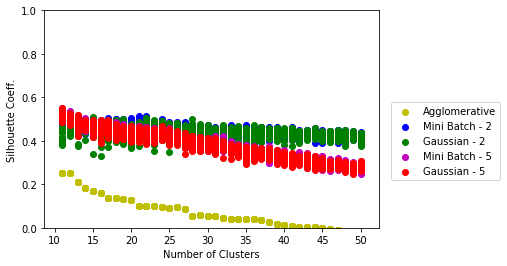

In [28]:
ag_data_sil = np.matrix(np.vstack(ag_data_sil))

mini_data_sil_2 = np.matrix(np.vstack(mini_data_sil_2))
gmm_data_sil_2 = np.matrix(np.vstack(gmm_data_sil_2))

mini_data_sil_5 = np.matrix(np.vstack(mini_data_sil_5))
gmm_data_sil_5 = np.matrix(np.vstack(gmm_data_sil_5))

plt.figure()
plotReg([ag_data_sil, mini_data_sil_2, gmm_data_sil_2, mini_data_sil_5, gmm_data_sil_5], ['Agglomerative', 'Mini Batch - 2', 'Gaussian - 2','Mini Batch - 5', 'Gaussian - 5'],'Silhouette Coeff.','Number of Clusters', ['y','b','g','m','r'])
ax = plt.gca()
ax.set_ylim(0.0,1.0)
plt.legend(loc=9, bbox_to_anchor=(1.2, 0.6))